In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
# Importing all necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
# import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics


In [38]:
diamond_data = pd.read_csv("/content/drive/MyDrive/datasets/diaspp.csv")
diamond_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,2.0,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,3.0,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,4.0,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,5.0,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [25]:
diamond_data.shape

(2001, 11)

In [26]:
diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1999 non-null   float64
 1   carat       1999 non-null   float64
 2   cut         1999 non-null   object 
 3   color       1999 non-null   object 
 4   clarity     1999 non-null   object 
 5   depth       1999 non-null   float64
 6   table       1999 non-null   float64
 7   price       1999 non-null   float64
 8   x           1999 non-null   float64
 9   y           1999 non-null   float64
 10  z           1999 non-null   float64
dtypes: float64(8), object(3)
memory usage: 172.1+ KB


In [28]:
diamond_data = diamond_data.drop(["Unnamed: 0"], axis=1)
diamond_data.describe()

,carat,depth,table,price,x,y,z
count,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,0.711881,61.782991,57.589895,2626.101551,5.671396,5.670020,3.503367
std,0.185784,1.645253,2.364694,787.120782,0.576590,0.565089,0.363340
min,0.200000,53.000000,51.000000,326.000000,3.790000,3.750000,2.270000
25%,0.700000,61.000000,56.000000,2804.000000,5.660000,5.680000,3.480000
50%,0.720000,61.800000,57.000000,2878.000000,5.780000,5.790000,3.560000
75%,0.800000,62.600000,59.000000,2982.000000,5.950000,5.950000,3.675000
max,1.500000,69.500000,70.000000,3099.000000,7.260000,7.090000,4.700000


In [30]:
diamond_data = diamond_data.drop(diamond_data[diamond_data["x"]==0].index)
diamond_data = diamond_data.drop(diamond_data[diamond_data["y"]==0].index)
diamond_data = diamond_data.drop(diamond_data[diamond_data["z"]==0].index)
diamond_data.shape

(2001, 10)

In [31]:
diamond_data = diamond_data[(diamond_data["depth"]<75)&(diamond_data["depth"]>45)]
diamond_data = diamond_data[(diamond_data["table"]<80)&(diamond_data["table"]>40)]
diamond_data = diamond_data[(diamond_data["x"]<30)]
diamond_data = diamond_data[(diamond_data["y"]<30)]
diamond_data = diamond_data[(diamond_data["z"]<30)&(diamond_data["z"]>2)]
diamond_data.shape

(1999, 10)

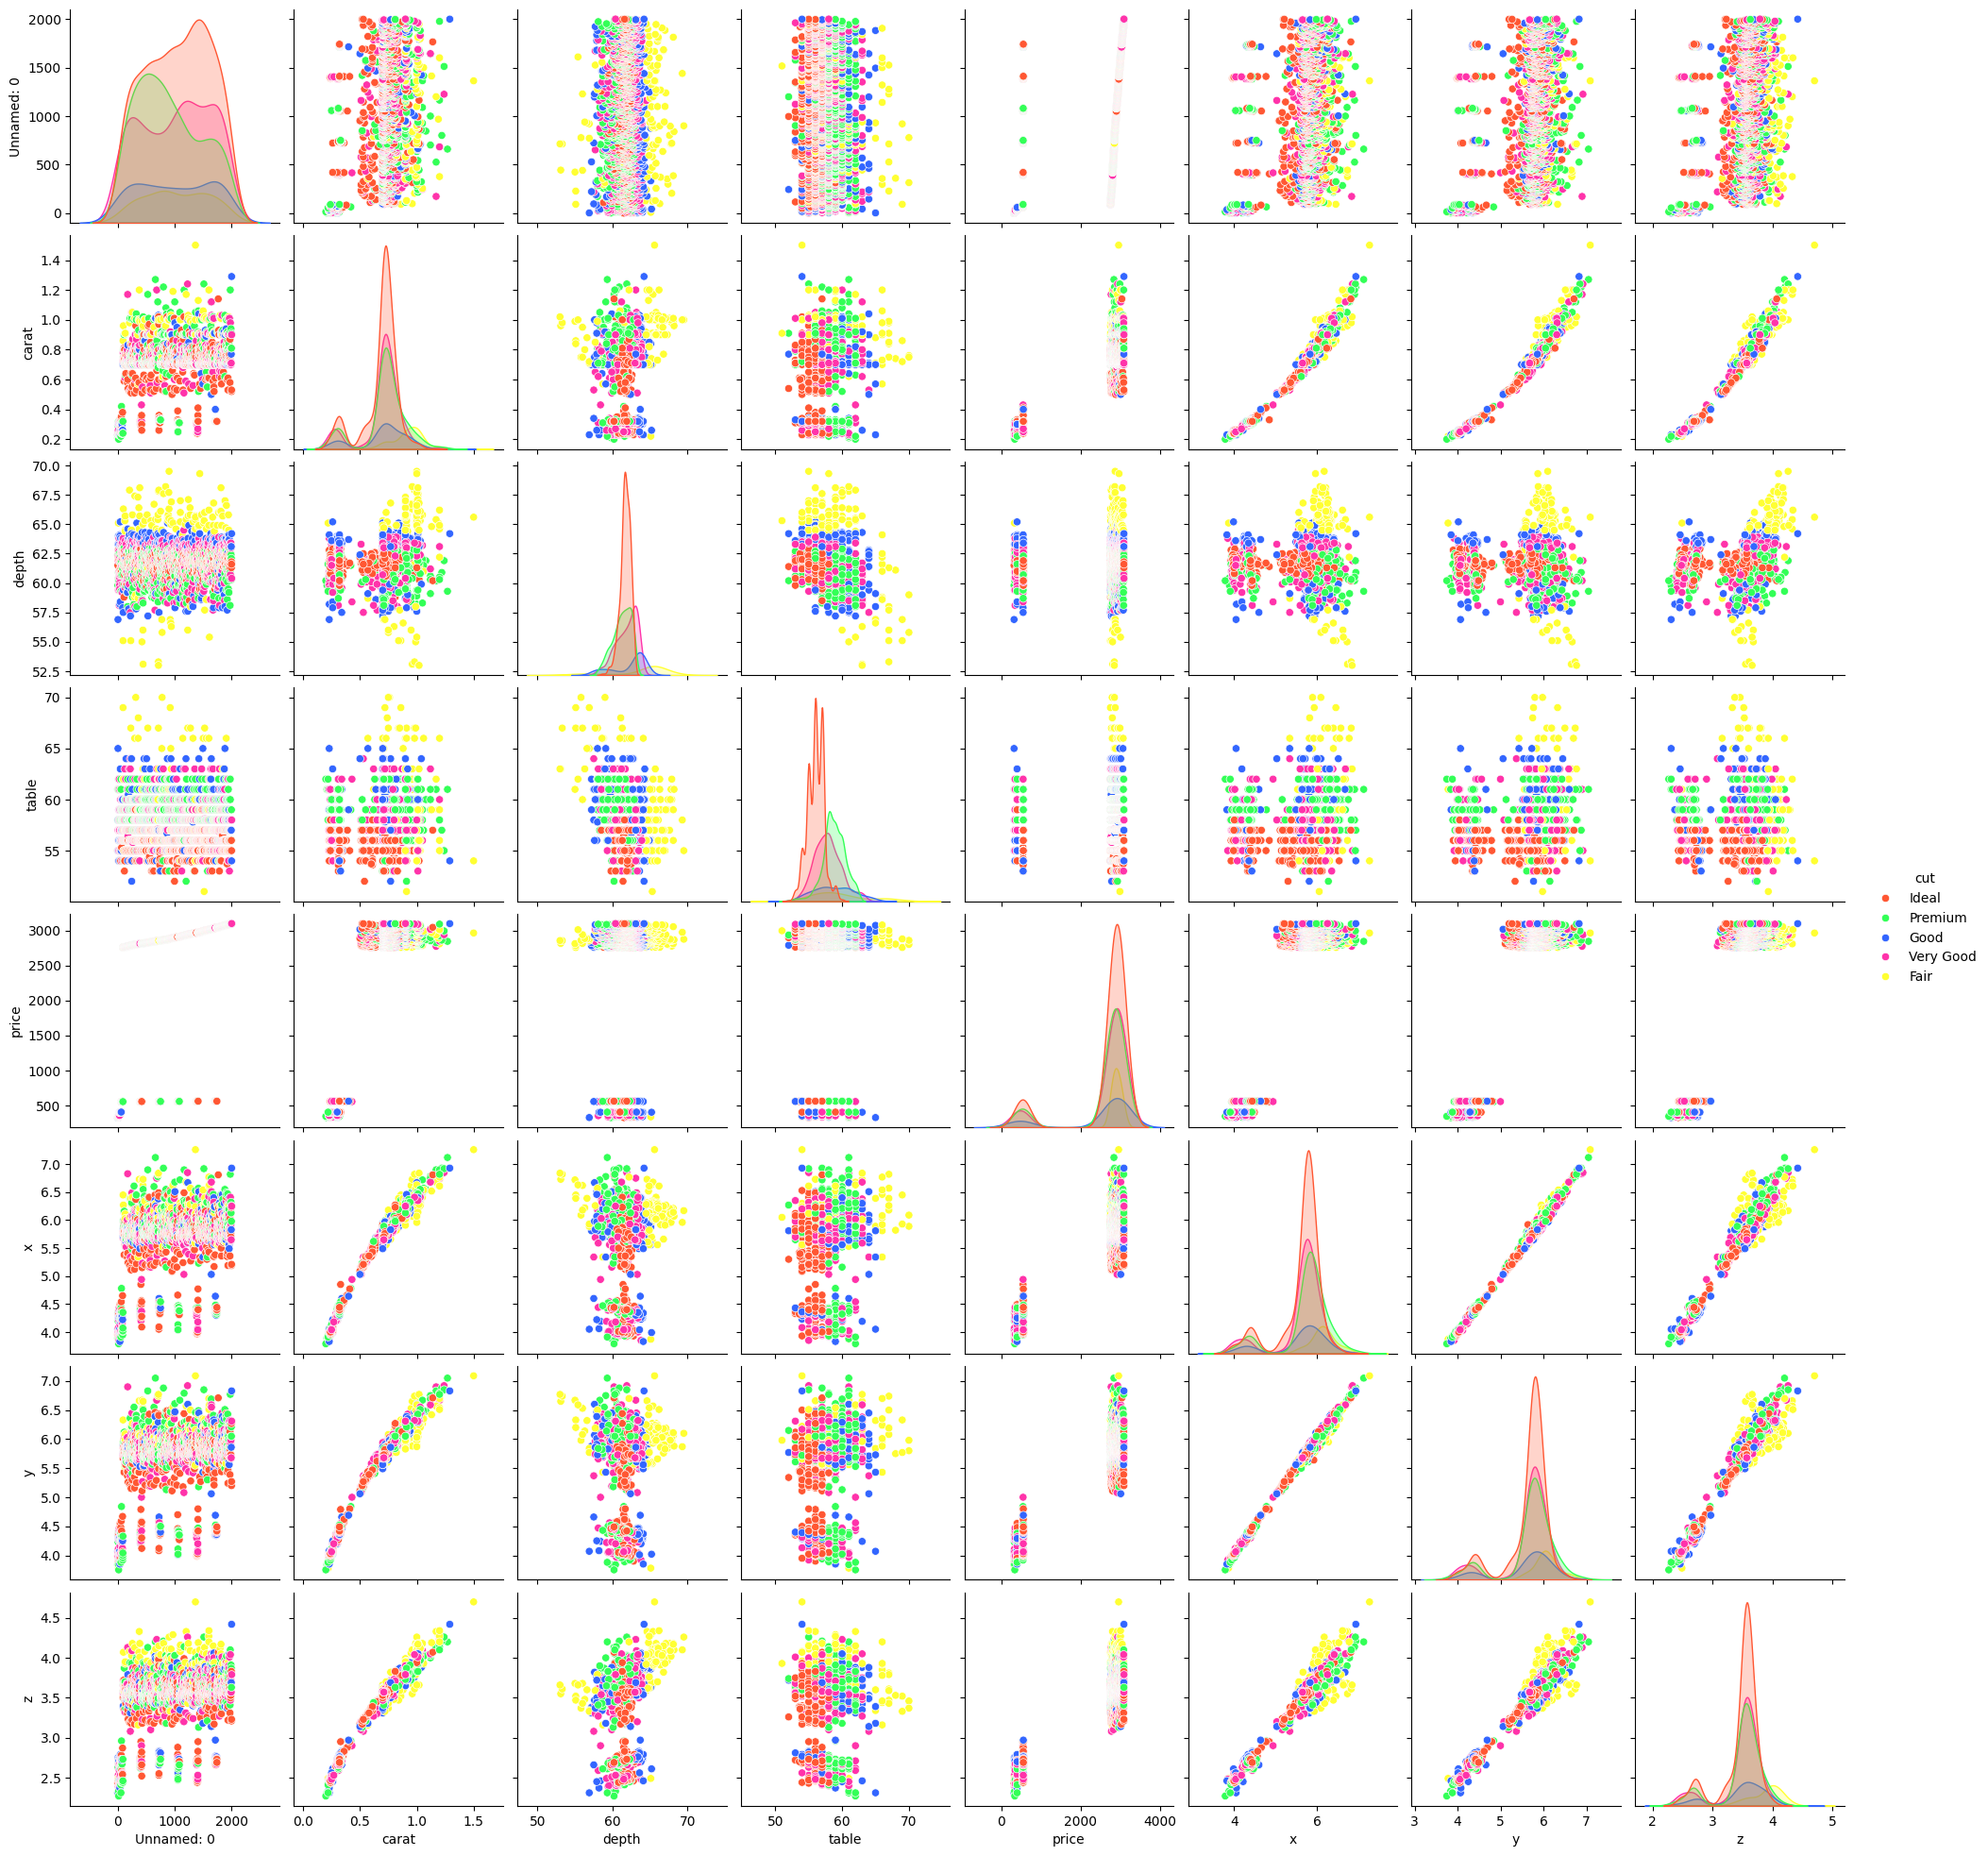

In [39]:
custom_palette = ["#FF5733", "#33FF57", "#3366FF", "#FF33AA", "#FFFF33"]
ax=sns.pairplot(diamond_data, hue='cut', palette=custom_palette)

In [40]:
s = (diamond_data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [42]:
diamond_data = diamond_data.drop(["Unnamed: 0"], axis=1)
label_data = diamond_data.copy()

label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335.0,4.34,4.35,2.75


In [44]:
diamond_data.describe()

,carat,depth,table,price,x,y,z
count,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,0.711881,61.782991,57.589895,2626.101551,5.671396,5.670020,3.503367
std,0.185784,1.645253,2.364694,787.120782,0.576590,0.565089,0.363340
min,0.200000,53.000000,51.000000,326.000000,3.790000,3.750000,2.270000
25%,0.700000,61.000000,56.000000,2804.000000,5.660000,5.680000,3.480000
50%,0.720000,61.800000,57.000000,2878.000000,5.780000,5.790000,3.560000
75%,0.800000,62.600000,59.000000,2982.000000,5.950000,5.950000,3.675000
max,1.500000,69.500000,70.000000,3099.000000,7.260000,7.090000,4.700000


<Axes: >

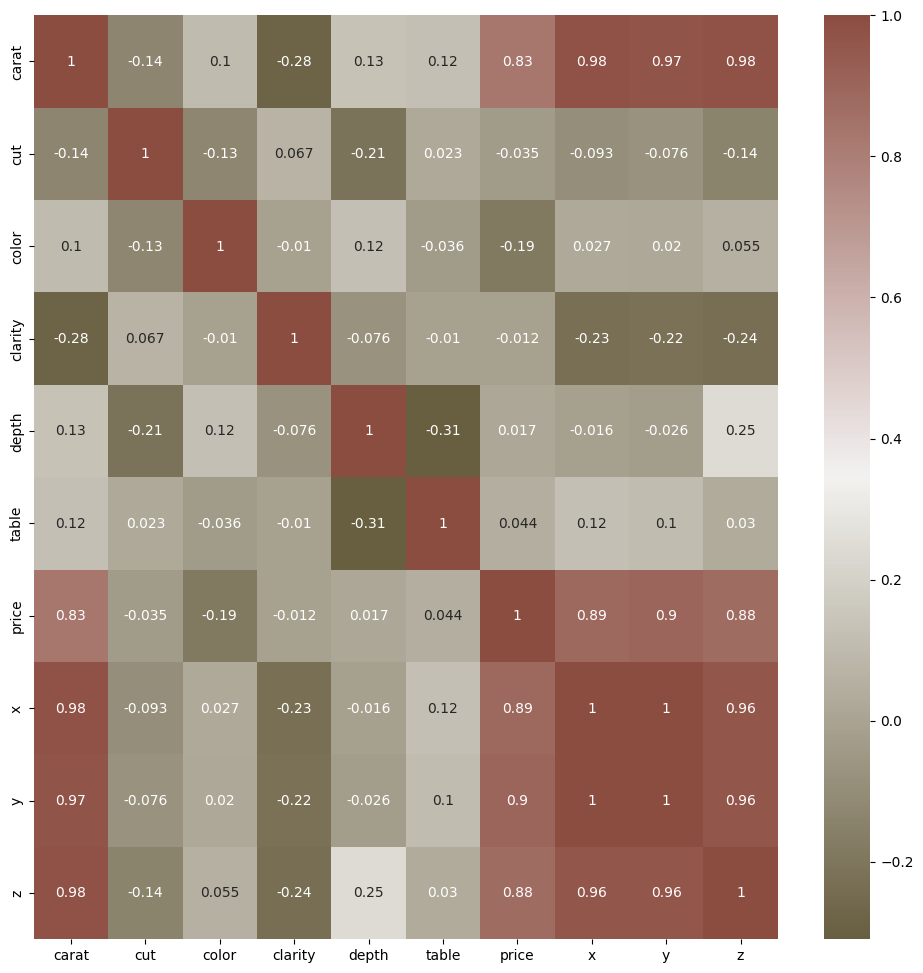

In [45]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

In [49]:
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [53]:
imputer = SimpleImputer(strategy='mean')

pipeline_lr = Pipeline([("imputer", imputer),
                        ("scalar1", StandardScaler()),
                        ("lr_classifier", LinearRegression())])

pipeline_dt = Pipeline([("imputer", imputer),
                        ("scalar2", StandardScaler()),
                        ("dt_classifier", DecisionTreeRegressor())])

pipeline_rf = Pipeline([("imputer", imputer),
                        ("scalar3", StandardScaler()),
                        ("rf_classifier", RandomForestRegressor())])

pipeline_kn = Pipeline([("imputer", imputer),
                        ("scalar4", StandardScaler()),
                        ("rf_classifier", KNeighborsRegressor())])

pipeline_xgb = Pipeline([("imputer", imputer),
                         ("scalar5", StandardScaler()),
                         ("rf_classifier", XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest", 3: "KNeighbors", 4: "XGBRegressor"}

nan_indices = np.isnan(y_train)

# Remove rows with NaN values from X_train and y_train
X_train_filtered = X_train[~nan_indices]
y_train_filtered = y_train[~nan_indices]

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train_filtered, y_train_filtered)

In [55]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train_filtered, y_train_filtered, scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -207.305315 
DecisionTree: -120.335282 
RandomForest: -89.599242 
KNeighbors: -94.769276 
XGBRegressor: -94.639508 


In [56]:
pred = pipeline_xgb.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Predicted Values')

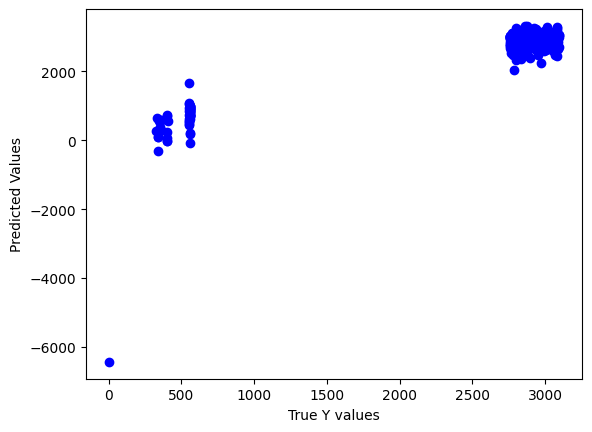

In [82]:
lr = LinearRegression()
lr.fit(X_train_filtered, y_train_filtered)

X_test = np.nan_to_num(X_test)
y_pred = lr.predict(X_test)

plt.scatter(y_test, y_pred, c='blue')
plt.xlabel('True Y values')
plt.ylabel('Predicted Values')

In [77]:
print("R^2:", metrics.r2_score(y_test, y_pred))
print("Adjusted R^2:", 1 - (1 - metrics.r2_score(y_test, y_pred)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.8057809915717976
Adjusted R^2: 0.8022209690140505
MAE: 163.4354612337552
MSE: 123148.47023251
RMSE: 350.92516329341504


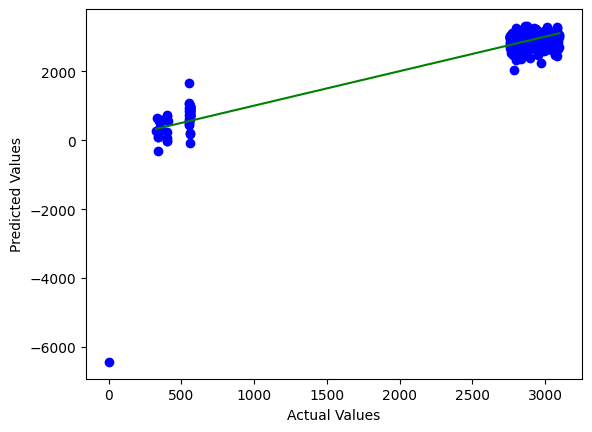

In [81]:
plt.scatter(y_test, y_pred, c='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot((y.min(), y.max()), (y.min(), y.max()), color='green')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.222e+07, tolerance: 9.271e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Predicted Values')

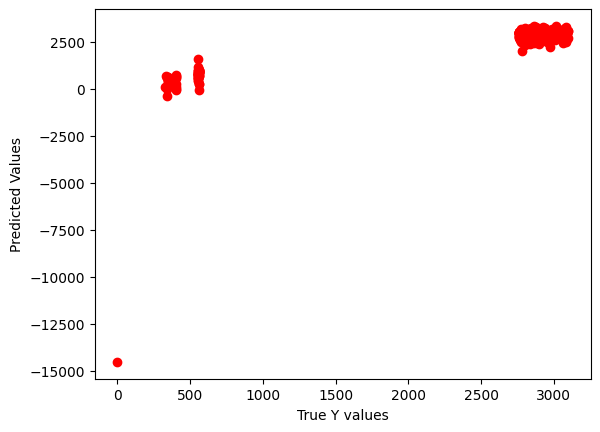

In [80]:
model = Lasso(alpha=0.1)
model.fit(X_train_filtered, y_train_filtered)

y_pred2 = model.predict(X_test)
plt.scatter(y_test, y_pred2, c='red')
plt.xlabel('True Y values')
plt.ylabel('Predicted Values')

In [76]:
# Model Evaluation
print("R^2:", metrics.r2_score(y_test, y_pred2))
print("Adjusted R^2:", 1 - (1 - metrics.r2_score(y_test, y_pred2)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred2))
print("MSE:", metrics.mean_squared_error(y_test, y_pred2))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

R^2: 0.27052970329258585
Adjusted R^2: 0.2571585573244255
MAE: 181.0184749866028
MSE: 462535.3195167926
RMSE: 680.0994923662219


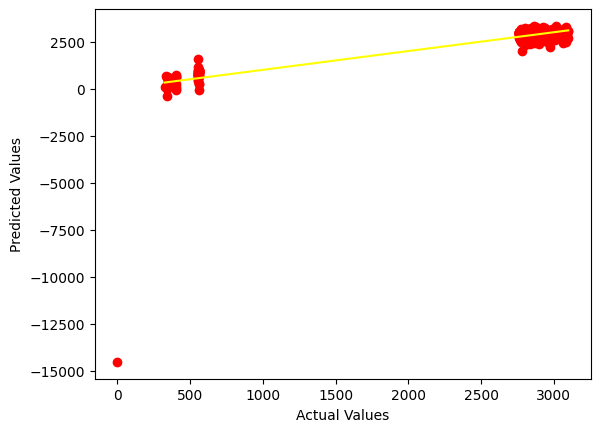

In [85]:
plt.scatter(y_test, y_pred2, c='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot((y.min(), y.max()), (y.min(), y.max()), color='yellow')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Predicted Values')

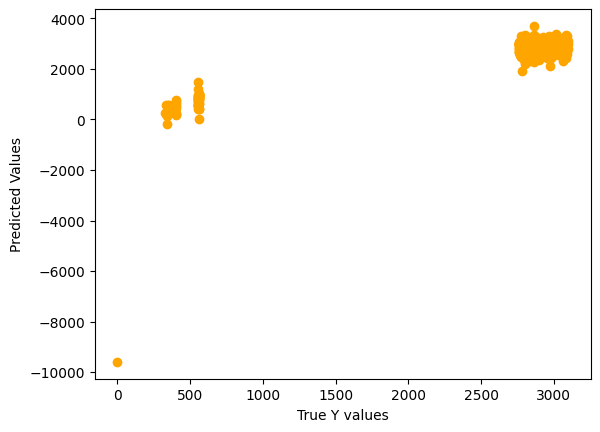

In [89]:
model = Ridge(alpha=1.0)
model.fit(X_train_filtered, y_train_filtered)

y_pred3 = model.predict(X_test)
plt.scatter(y_test, y_pred3, c='orange')
plt.xlabel('True Y values')
plt.ylabel('Predicted Values')

In [87]:
# Model Evaluation
print("R^2:", metrics.r2_score(y_test, y_pred3))
print("Adjusted R^2:", 1 - (1 - metrics.r2_score(y_test, y_pred3)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred3))
print("MSE:", metrics.mean_squared_error(y_test, y_pred3))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

R^2: 0.6324511603653803
Adjusted R^2: 0.625714012592037
MAE: 184.15240950847485
MSE: 233051.73733018062
RMSE: 482.75432398910795


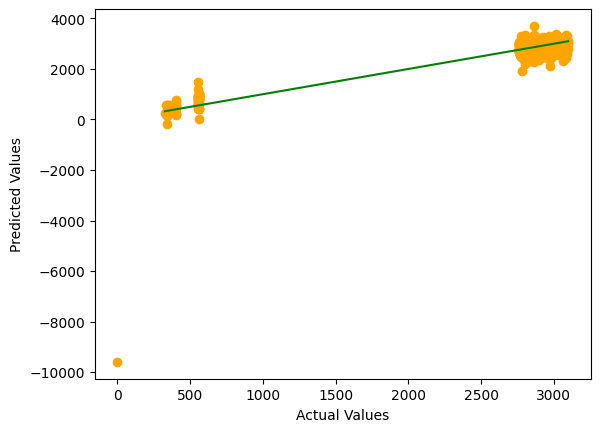

In [88]:
plt.scatter(y_test, y_pred3, c='orange')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot((y.min(), y.max()), (y.min(), y.max()), color='green')
plt.show()

In [91]:
metricsTable = pd.DataFrame({"Model": ["Linear Regression", "Lasso Regression", "Ridge Regression"], "R2 Score": [metrics.r2_score(y_test, y_pred), metrics.r2_score(y_test, y_pred2), metrics.r2_score(y_test, y_pred3)], "Mean Squared Error": [metrics.mean_squared_error(y_test, y_pred), metrics.mean_squared_error(y_test, y_pred2), metrics.mean_squared_error(y_test, y_pred3)], "Mean Absolute Error": [metrics.mean_absolute_error(y_test, y_pred), metrics.mean_absolute_error(y_test, y_pred2), metrics.mean_absolute_error(y_test, y_pred3)], "Root Mean Squared Error": [np.sqrt(metrics.mean_squared_error(y_test, y_pred)), np.sqrt(metrics.mean_squared_error(y_test, y_pred2)), np.sqrt(metrics.mean_squared_error(y_test, y_pred3))]})
metricsTable

,Model,R2 Score,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error
0,Linear Regression,0.805781,123148.470233,163.435461,350.925163
1,Lasso Regression,0.270530,462535.319517,181.018475,680.099492
2,Ridge Regression,0.632451,233051.737330,184.152410,482.754324
